# Dự Án Phân Tích Chuyên Sâu Bất Động Sản: EDA

1. Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
# Tắt dạng số e+09
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set(style="whitegrid")


2. Load & Chuẩn hóa dữ liệu

In [3]:
DATA_PATH = "."
CSV_FILE = "real_estate_cleaned.csv"

df = pd.read_csv(f"{DATA_PATH}/{CSV_FILE}")

# Chuyển các cột số
for col in ["price", "area"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Đổi tên cột
rename_map = {
    "title": "Tiêu đề",
    "description": "Mô tả",
    "price": "Giá bán (VND)",
    "area": "Diện tích (m²)",
    "bedrooms": "Phòng ngủ",
    "bathrooms": "Toilet",
    "city": "Thành phố",
    "district": "Quận/Huyện",
    "legal_status": "Pháp lý",
    "date": "Ngày đăng",
}

df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns}, inplace=True)

# Tạo cột giá theo TỶ
df["Giá (tỷ)"] = df["Giá bán (VND)"] / 1_000_000_000
df["Giá (tỷ)"] = df["Giá (tỷ)"].round(2)

# Thông tin tổng quan về DataFrame: số dòng, số cột, kiểu dữ liệu
df.info()

# Thống kê số liệu cho các cột số
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9740 entries, 0 to 9739
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Phòng ngủ       9740 non-null   int64  
 1   Ngày đăng       9740 non-null   object 
 2   Toilet          9740 non-null   int64  
 3   Diện tích (m²)  9740 non-null   float64
 4   Pháp lý         9740 non-null   object 
 5   Tiêu đề         9740 non-null   object 
 6   Giá bán (VND)   9740 non-null   float64
 7   Thành phố       9740 non-null   object 
 8   link            9740 non-null   object 
 9   Quận/Huyện      9740 non-null   object 
 10  Mô tả           9740 non-null   object 
 11  Giá (tỷ)        9740 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 913.3+ KB


,Phòng ngủ,Ngày đăng,Toilet,Diện tích (m²),Pháp lý,Tiêu đề,Giá bán (VND),Thành phố,link,Quận/Huyện,Mô tả,Giá (tỷ)
0,3,2025-11-18,3,68.00,Sổ đỏ/ Sổ hồng,"🏘️ NHÀ PHỐ THOÁNG MÁT – BÌNH HƯNG HÒA B, BÌNH ...",6700000000.00,TP. Hồ Chí Minh,https://batdongsan.vn/nha-pho-thoang-mat-binh-...,Bình Tân,"📍 Vị trí cực đẹp, hẻm lớn thông tứ hướng, gần ...",6.70
1,6,2025-11-18,5,80.00,Sổ đỏ/ Sổ hồng,Chính thức dọn về căn nhà phố 16.8 Tỷ tuyệt đẹ...,16800000000.00,TP. Hồ Chí Minh,https://batdongsan.vn/chinh-thuc-don-ve-can-nh...,Quận 7,Chính thức dọn về căn nhà phố 16.8 Tỷ tuyệt đẹ...,16.80
2,4,2025-11-18,3,56.00,Sổ đỏ/ Sổ hồng,NHÀ 4 TẦNG BTCT MỚI ĐẸP KẾ TRƯỜNG VÕ TƯỜNG TOẢ...,5700000000.00,TP. Hồ Chí Minh,https://batdongsan.vn/nha-4-tang-btct-moi-dep-...,Quận 12,- Diện tích: 4 x 14m. Khu dân cư hiện hữu.- Nh...,5.70
3,6,2025-11-18,6,840.00,Sổ đỏ/ Sổ hồng,Bán Đất Tặng Nhà Biệt Thự 4 Tầng Quốc Lộ 13 Cũ...,55000000000.00,TP. Hồ Chí Minh,https://batdongsan.vn/ban-dat-tang-nha-biet-th...,Thủ Đức,Bán Đất Tặng Nhà Biệt Thự 4 Tầng Quốc Lộ 13 Cũ...,55.00
4,4,2025-11-18,3,160.00,Sổ đỏ/ Sổ hồng,"BÁN NHÀ 3 TẦNG MẶT TIỀN NGAY HUỲNH TẤN PHÁT, Q...",15000000000.00,TP. Hồ Chí Minh,https://batdongsan.vn/ban-nha-3-tang-mat-tien-...,Quận 7,* SIÊU PHẨM VIP HIẾM BÁN - MẶT TIỀN KD Đ. LÊ T...,15.00


## 4.1 PHÂN TÍCH MÔ TẢ

### 4.1.1 Phân bố giá

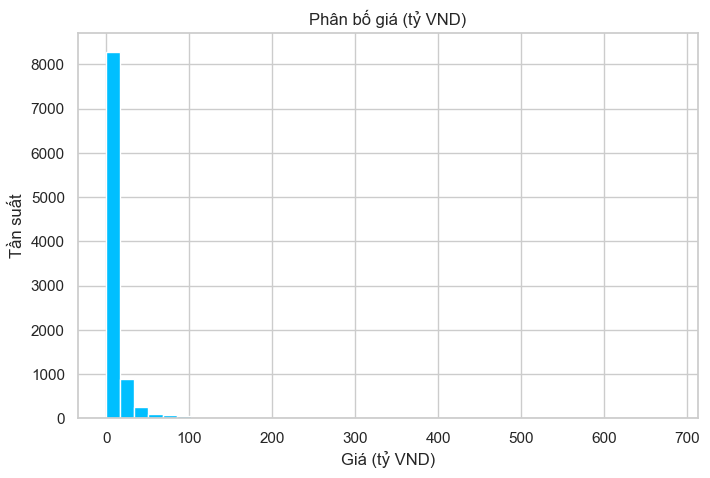

In [4]:
plt.figure(figsize=(8,5))
df["Giá (tỷ)"].dropna().hist(bins=40, color="deepskyblue")
plt.xlabel("Giá (tỷ VND)")
plt.ylabel("Tần suất")
plt.title("Phân bố giá (tỷ VND)")
plt.show()


**Kết quả phân tích:**

Phân bố giá có dạquậnng lệch phải, tức là phần lớn tin đăng tập trung ở mức giá thấp, trong khi số lượng tin đăng ở mức giá cao giảm dần.

Khoảng giá phổ biến nhất là từ 1 đến 5 tỷ đồng, chiếm hơn 60% tổng số tin đăng.
Các bất động sản có giá trên 10 tỷ đồng xuất hiện ít, chủ yếu tập trung ở các quận trung tâm như Quận 1, Quận 3, Quận 7.

Một số giá trị ngoại lai (outliers) có giá trên 600 tỷ đồng, thường là biệt thự hoặc nhà phố lớn, cần được xử lý cẩn thận trong các bước phân tích tiếp theo.


**Nhận xét:**

Thị trường bất động sản TP.HCM hiện nay có xu hướng nghiêng về phân khúc trung cấp, phù hợp với khả năng tài chính của đa số người dân.

Việc phân bố giá không đồng đều cho thấy sự phân hóa rõ rệt giữa các khu vực, là cơ sở quan trọng để phân tích theo quận và xây dựng mô hình dự đoán giá.


### 4.1.2 Phân bố diện tích

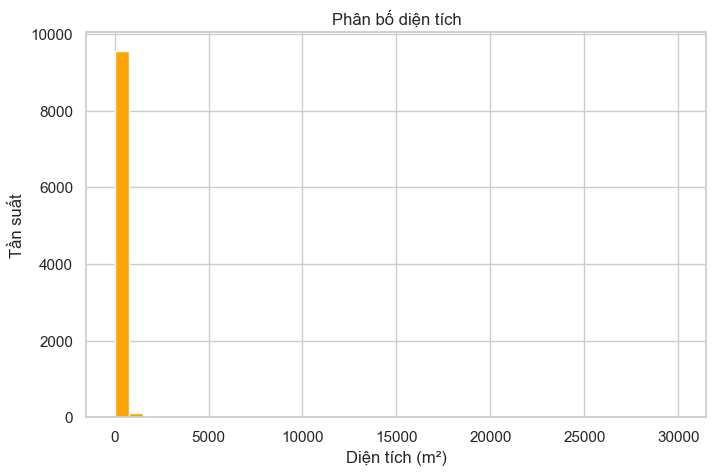

In [5]:
plt.figure(figsize=(8,5))
df["Diện tích (m²)"].dropna().hist(bins=40, color="orange")
plt.xlabel("Diện tích (m²)")
plt.ylabel("Tần suất")
plt.title("Phân bố diện tích")
plt.show()


**Kết quả phân tích:**

Phân bố diện tích có dạng lệch phải, tức là số lượng bất động sản giảm dần khi diện tích tăng.

Khoảng diện tích phổ biến nhất là từ 40–80 m², phù hợp với căn hộ và nhà phố trung cấp.

Các bất động sản có diện tích lớn hơn 200 m² xuất hiện ít, thường là biệt thự hoặc đất nền ở khu vực ngoại thành.

Một số giá trị ngoại lai (outliers) có diện tích rất lớn (>500 m²), cần được xử lý riêng trong các bước phân tích mô hình.


**Nhận xét:**

Thị trường TP.HCM hiện nay tập trung mạnh vào phân khúc diện tích vừa phải, đáp ứng nhu cầu ở thực của phần lớn người dân.

Các bất động sản diện tích lớn tuy ít nhưng phản ánh sự phân hóa rõ rệt giữa trung tâm và vùng ven, đồng thời gắn liền với phân khúc cao cấp.


### 4.1.3 Boxplot giá theo quận

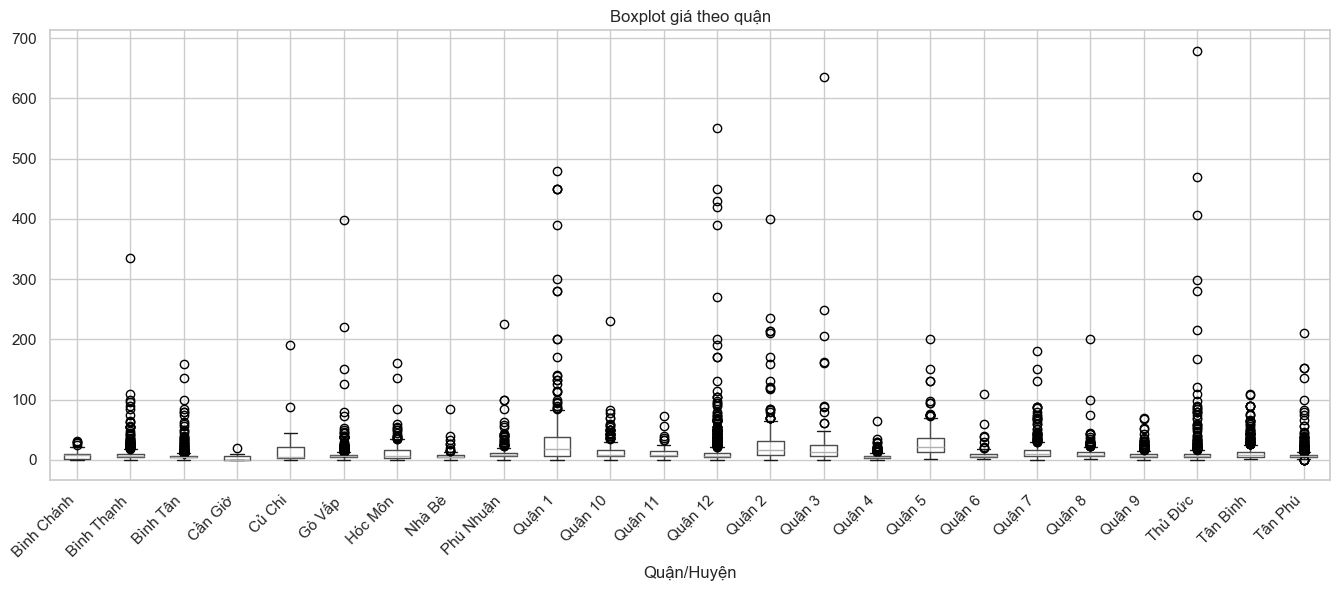

In [6]:
fig, ax = plt.subplots(figsize=(16, 6))  # tăng chiều ngang

df.boxplot(column="Giá (tỷ)", by="Quận/Huyện", ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_title("Boxplot giá theo quận")
plt.suptitle("")  # xóa title mặc định

plt.show()


**Kết quả phân tích:**

Quận 1, Quận 3, Phú Nhuận: có median giá cao nhất, nhiều bất động sản trên 20–30 tỷ đồng.

Quận 7, Bình Thạnh, Thủ Đức: giá trung bình ở mức khá cao, phân bố rộng, phản ánh sự đa dạng phân khúc.

Các quận vùng ven như Bình Chánh, Hóc Môn, Củ Chi, Cần Giờ: giá thấp hơn rõ rệt, median chỉ từ 1–3 tỷ đồng.

Xuất hiện nhiều outliers ở các quận trung tâm, với giá trị vượt xa mức trung bình (có thể trên 100 tỷ đồng).


**Nhận xét:**

Thị trường bất động sản TP.HCM có sự phân hóa mạnh theo vị trí địa lý.

Các quận trung tâm tập trung nhiều sản phẩm cao cấp, trong khi vùng ven chủ yếu là phân khúc bình dân.


### 4.1.4 Top 10 quận đắt nhất (giá trung bình)

In [7]:
df.groupby("Quận/Huyện")["Giá (tỷ)"].mean()\
  .sort_values(ascending=False).head(10)


Quận/Huyện
Quận 1    41.90
Quận 5    30.74
Quận 2    29.53
Quận 3    27.49
Củ Chi    21.46
Thủ Đức   14.78
Quận 7    14.05
Quận 12   13.69
Quận 10   13.31
Quận 11   13.01
Name: Giá (tỷ), dtype: float64

**Nhận xét:**

Các quận trung tâm như Quận 1, Quận 2, Quận 5 có giá trung bình cao nhất, phản ánh vị trí đắc địa và mật độ phát triển cao.

Một số quận ngoại thành như Củ Chi và Thủ Đức cũng lọt vào top nhờ sự phát triển hạ tầng và quy hoạch đô thị mới.

Đây là cơ sở quan trọng để phân khúc thị trường và xác định khu vực tiềm năng đầu tư.


### 4.1.5 Top 10 quận nhiều nguồn cung (nhiều tin đăng)

In [8]:
df["Quận/Huyện"].value_counts().head(10)


Quận/Huyện
Quận 12       1101
Gò Vấp         978
Tân Phú        954
Bình Tân       932
Tân Bình       740
Quận 8         617
Bình Thạnh     617
Thủ Đức        559
Quận 7         507
Quận 10        462
Name: count, dtype: int64

**Nhận xét:**

Các quận có nguồn cung lớn nhất đều nằm ở khu vực đông dân cư, có mật độ xây dựng cao và nhiều dự án nhà ở như Quận 12, Gò Vấp, Tân Phú, Bình Tân.

Những khu vực này thường cung cấp sản phẩm thuộc phân khúc bình dân và trung cấp, phù hợp với nhu cầu.

Việc có nguồn cung lớn cũng phản ánh mức độ sôi động của thị trường, là cơ sở để phân tích tiềm năng đầu tư và xây dựng mô hình dự đoán giá.


## 4.2 PHÂN TÍCH THEO KHU VỰC (SPATIAL)

### 4.2.1 Giá trung bình theo quận

,Quận/Huyện,Giá (tỷ)
3,Cần Giờ,4.99
15,Quận 4,6.85
7,Nhà Bè,7.03
2,Bình Tân,7.31
0,Bình Chánh,7.84
5,Gò Vấp,8.18
23,Tân Phú,8.71
20,Quận 9,8.81
17,Quận 6,9.27
19,Quận 8,10.64


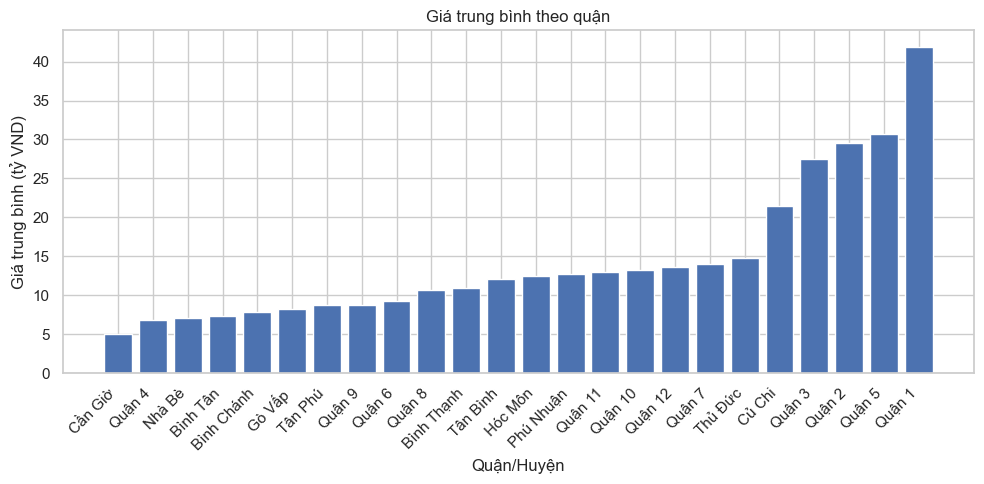

In [9]:
# Tính giá trung bình theo quận
avg_price_df = df.groupby("Quận/Huyện")["Giá (tỷ)"].mean().reset_index()
# Sắp xếp từ thấp → cao
avg_price_df = avg_price_df.sort_values("Giá (tỷ)", ascending=True)
display(avg_price_df)
# Vẽ biểu đồ cột giá trung bình theo quận
plt.figure(figsize=(10,5))
plt.bar(avg_price_df["Quận/Huyện"], avg_price_df["Giá (tỷ)"])
plt.xticks(rotation=45, ha="right") 
plt.xlabel("Quận/Huyện")
plt.ylabel("Giá trung bình (tỷ VND)")
plt.title("Giá trung bình theo quận")

plt.tight_layout()
plt.show()



**Kết quả phân tích:**

Quận 1 dẫn đầu với giá trung bình khoảng 41.9 tỷ đồng, tiếp theo là Quận 5 (30.7 tỷ), Quận 2 (29.5 tỷ) và Quận 3 (27.5 tỷ).

Các quận như Củ Chi, Thủ Đức, Quận 7 có giá trung bình dao động từ 14–21 tỷ đồng, phản ánh sự phát triển hạ tầng và đô thị hóa.

Các quận vùng ven như Cần Giờ, Bình Chánh, Hóc Môn có giá trung bình thấp hơn, dưới 10 tỷ đồng.


**Nhận xét:**

Giá bất động sản tại TP.HCM có sự phân hóa rõ rệt theo vị trí địa lý.

Các quận trung tâm có giá cao do vị trí đắc địa, mật độ dân cư và tiện ích đô thị.


### 4.2.2 Giá/m² theo quận

,Quận/Huyện,Giá/m²
4,Củ Chi,14344098.81
3,Cần Giờ,28288071.50
6,Hóc Môn,49277703.01
0,Bình Chánh,58151544.22
7,Nhà Bè,76519808.71
12,Quận 12,78660139.65
20,Quận 9,96246690.91
2,Bình Tân,109803713.83
23,Tân Phú,110915617.89
15,Quận 4,114602339.02


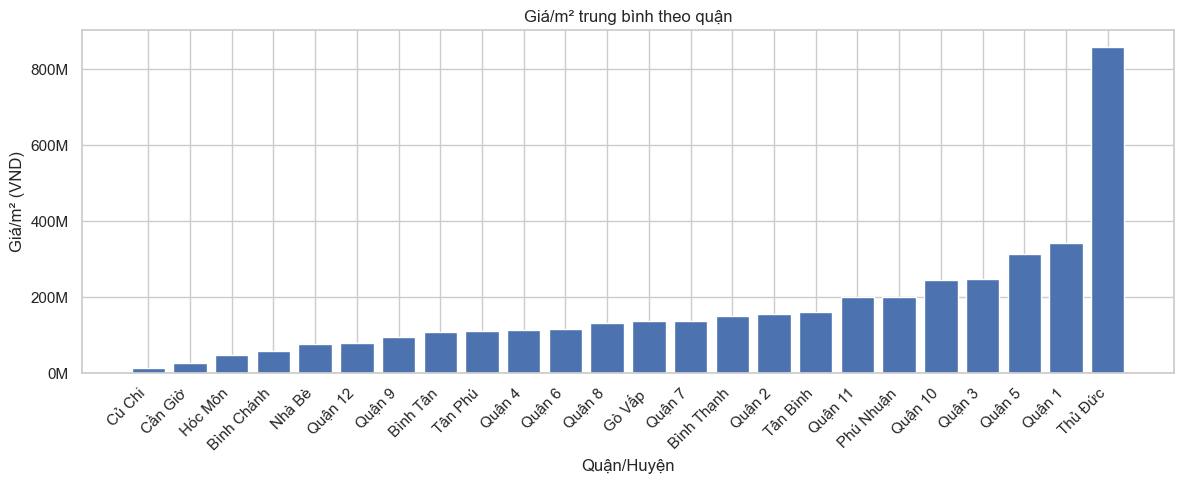

In [10]:
# Tính giá/m²
df["Giá/m²"] = df["Giá bán (VND)"] / df["Diện tích (m²)"]
df["Giá/m²"] = df["Giá/m²"].round(0)

# Group theo quận và sắp xếp từ thấp → cao
price_m2_df = df.groupby("Quận/Huyện")["Giá/m²"].mean().reset_index()
price_m2_df = price_m2_df.sort_values("Giá/m²", ascending=True)

display(price_m2_df)

# Vẽ biểu đồ
plt.figure(figsize=(12,5))
plt.bar(price_m2_df["Quận/Huyện"], price_m2_df["Giá/m²"])

plt.xticks(rotation=45, ha="right")
plt.xlabel("Quận/Huyện")
plt.ylabel("Giá/m² (VND)")
plt.title("Giá/m² trung bình theo quận")

# --- FORMAT TRỤC Y THÀNH 800M, 1.2B ---
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'{x/1_000_000:.0f}M'
))

plt.tight_layout()
plt.show()

**Kết quả phân tích:**

Thủ Đức có giá/m² cao nhất, lên đến 859 triệu đồng/m², vượt xa các quận còn lại. Đây có thể là do một số dự án cao cấp hoặc giá trị ngoại lai cần được kiểm tra thêm.

Các quận trung tâm như Quận 1 (343 triệu/m²), Quận 5 (315 triệu/m²), Quận 3 (248 triệu/m²) và Quận 10 (246 triệu/m²) đều có giá/m² rất cao, phản ánh vị trí đắc địa và nhu cầu lớn.

Các quận như Phú Nhuận, Quận 11, Tân Bình, Quận 2, Bình Thạnh có giá dao động từ 150–200 triệu/m², thuộc nhóm cao cấp.

Nhóm trung cấp gồm Quận 7, Gò Vấp, Quận 8, Quận 6, Quận 4, Tân Phú, Bình Tân, với giá từ 100–140 triệu/m².

Các quận vùng ven như Củ Chi (14 triệu/m²), Cần Giờ (28 triệu/m²), Hóc Môn (49 triệu/m²) có giá thấp nhất, phù hợp với phân khúc bình dân.


**Nhận xét:**

Giá/m² là chỉ số phản ánh hiệu quả sử dụng đất và giá trị vị trí.

Các khu vực có giá/m² cao thường là trung tâm thương mại, hành chính hoặc gần các tuyến giao thông lớn.


## 4.3 PHÂN TÍCH THEO THỜI GIAN (TEMPORAL)

### 4.3.1 Xu hướng giá theo năm

Năm
2023    8.49
2024   12.57
2025   12.91
Name: Giá (tỷ), dtype: float64

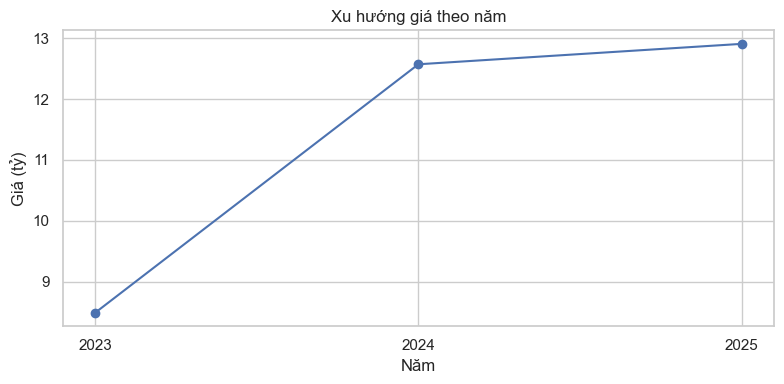

In [11]:
# Chuyển Ngày đăng → datetime và lấy Năm
df["Ngày đăng"] = pd.to_datetime(df["Ngày đăng"], errors="coerce")
df["Năm"] = df["Ngày đăng"].dt.year.astype(int)   # ép int luôn ở đây

# Tính giá trung bình theo năm
trend = df.groupby("Năm")["Giá (tỷ)"].mean()
display(trend)
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(trend.index, trend.values, marker="o")

ax.set_title("Xu hướng giá theo năm")
ax.set_ylabel("Giá (tỷ)")
ax.set_xlabel("Năm")

# Fix lỗi năm bị phẩy (hiển thị integer)
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


**Kết quả phân tích:**

Năm 2023: Giá trung bình đạt khoảng 8.49 tỷ đồng, phản ánh giai đoạn thị trường trầm lắng sau các chính sách kiểm soát tín dụng và tâm lý thận trọng của nhà đầu tư.

Năm 2024: Giá tăng mạnh lên 12.57 tỷ đồng, cho thấy tín hiệu phục hồi rõ rệt, đặc biệt ở các khu vực có hạ tầng phát triển và dự án mới.

Năm 2025: Giá tiếp tục tăng nhẹ lên 12.91 tỷ đồng, duy trì đà tăng trưởng ổn định, phản ánh niềm tin thị trường được củng cố.


**Nhận xét:**

Thị trường bất động sản TP.HCM đang trong chu kỳ phục hồi sau giai đoạn điều chỉnh.

Xu hướng tăng giá liên tục từ 2023 đến 2025 cho thấy tiềm năng đầu tư dài hạn, đặc biệt ở các quận có tốc độ đô thị hóa cao.


## 4.3.2 Số lượng tin đăng theo tháng

C:\Users\Admin\AppData\Local\Temp\ipykernel_10024\4045130740.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_count = df.resample("M", on="Ngày đăng").size()


Ngày đăng
2023-10-31      39
2023-11-30     469
2023-12-31      85
2024-01-31       0
2024-02-29       0
2024-03-31       0
2024-04-30       0
2024-05-31       0
2024-06-30       0
2024-07-31      95
2024-08-31     656
2024-09-30    1021
2024-10-31     567
2024-11-30    1565
2024-12-31    1880
2025-01-31    1120
2025-02-28    1127
2025-03-31      66
2025-04-30       0
2025-05-31       0
2025-06-30       0
2025-07-31       0
2025-08-31       0
2025-09-30       0
2025-10-31     466
2025-11-30     584
Freq: ME, dtype: int64

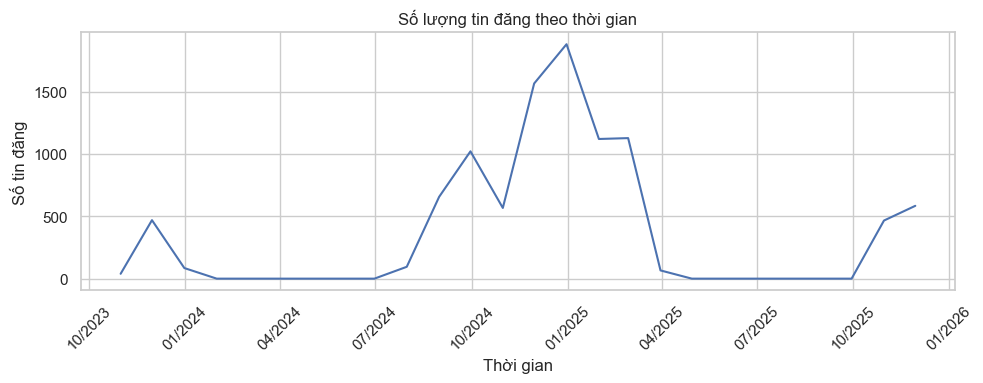

In [12]:
# Tính số lượng tin theo tháng
monthly_count = df.resample("M", on="Ngày đăng").size()
display(monthly_count)
# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(monthly_count.index, monthly_count.values)

# Tiêu đề & nhãn tiếng Việt
ax.set_title("Số lượng tin đăng theo thời gian")
ax.set_ylabel("Số tin đăng")
ax.set_xlabel("Thời gian")

# Định dạng trục X thành Tháng/Năm tiếng Việt
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%Y"))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Kết quả phân tích:**

Cuối năm 2023: Tin đăng bắt đầu tăng nhẹ, đạt đỉnh tạm thời vào tháng 11 với 469 tin, sau đó giảm mạnh vào tháng 12 (85 tin).

Nửa đầu năm 2024, thị trường bất động sản TP.HCM gần như đóng băng, với số lượng tin đăng duy trì ở mức 0 liên tục từ tháng 1 đến tháng 6. Tuy nhiên, đặc biệt trong quý IV, số lượng tin đăng tăng mạnh: tháng 8 ghi nhận 656 tin, tháng 9 đạt 1.021 tin, tháng 11 lên đến 1.565 tin, và tháng 12 chạm mốc 1.880 tin.

Năm 2025: Tin đăng duy trì ở mức cao trong quý I (~1,120 tin/tháng), sau đó giảm mạnh từ tháng 3 đến tháng 9.
Cuối năm 2025: Tin đăng phục hồi nhẹ với 466 tin vào tháng 10 và 584 tin vào tháng 11.


**Nhận xét:**

Thị trường bất động sản TP.HCM có chu kỳ rõ rệt, với giai đoạn trầm lắng đầu năm và sôi động vào cuối năm.

Giai đoạn cuối 2024 là thời điểm hoạt động giao dịch mạnh nhất, có thể liên quan đến chính sách kích cầu hoặc sự ra mắt của các dự án mới.


### 4.3.3 Quận biến động giá mạnh nhất (STD)

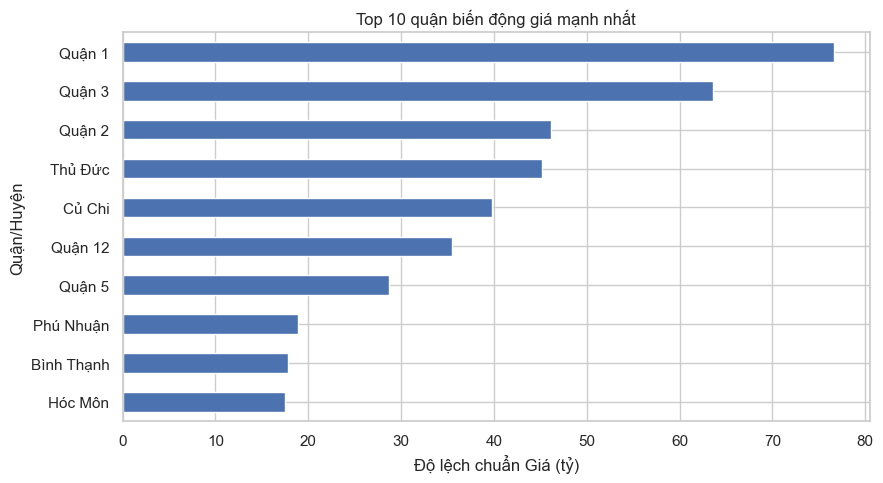

In [13]:
# Tính độ lệch chuẩn theo quận
var_district = (
    df.groupby("Quận/Huyện")["Giá (tỷ)"]
      .std()
      .sort_values(ascending=False)
      .head(10)
)
# --- HIỂN THỊ BẢNG ---
var_district

# --- VẼ BIỂU ĐỒ  ---
plt.figure(figsize=(9,5))
var_district.plot(
    kind="barh",
)

plt.title("Top 10 quận biến động giá mạnh nhất")
plt.xlabel("Độ lệch chuẩn Giá (tỷ)")
plt.ylabel("Quận/Huyện")

plt.gca().invert_yaxis()  # Quận biến động mạnh nhất nằm trên cùng

plt.tight_layout()
plt.show()




**Kết quả phân tích:**

Quận 1 là khu vực có độ biến động giá cao nhất, với mức giá dao động từ 41.9 tỷ lên đến 76.7 tỷ đồng, cho thấy sự ảnh hưởng mạnh từ các dự án cao cấp và vị trí trung tâm. Tiếp theo là Quận 3, Quận 2, Thủ Đức và Củ Chi, đều có mức tăng đáng kể, phản ánh sự phát triển hạ tầng và quy hoạch đô thị mới.

Các quận như Quận 12, Quận 5, Phú Nhuận, Bình Thạnh và Hóc Môn cũng ghi nhận biến động giá rõ rệt, dù mức tăng không quá đột biến. Những khu vực này thường nằm trong nhóm trung cấp, có nguồn cung ổn định và chịu ảnh hưởng từ nhu cầu ở thực.


**Nhận xét:**

Biến động giá cao thường gắn liền với các yếu tố như quy hoạch đô thị, hạ tầng giao thông, và dòng vốn đầu tư.

Việc theo dõi độ lệch chuẩn giúp đánh giá rủi ro và tiềm năng sinh lời của từng khu vực.


## 4.4. Phân tích chuyên sâu 

### 4.4.1 Mối quan hệ giữa diện tích và giá bán

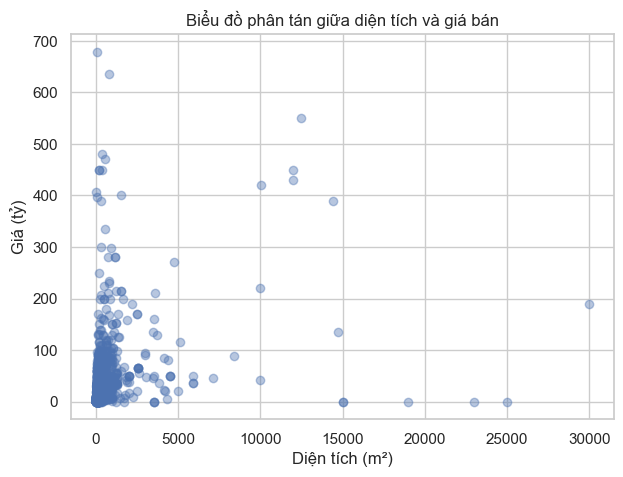

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(df["Diện tích (m²)"], df["Giá (tỷ)"], alpha=0.4)
plt.xlabel("Diện tích (m²)")
plt.ylabel("Giá (tỷ)")
plt.title("Biểu đồ phân tán giữa diện tích và giá bán")
plt.show()


**Kết quả phân tích:**

Biểu đồ cho thấy xu hướng tương quan dương: bất động sản có diện tích lớn thường có giá bán cao hơn. Tuy nhiên, mối quan hệ này không hoàn toàn tuyến tính.

Có sự tập trung dữ liệu ở vùng diện tích nhỏ (dưới 100 m²) và giá bán dưới 10 tỷ đồng, phản ánh phân khúc phổ biến trên thị trường.

Một số điểm ngoại lệ xuất hiện, ví dụ như bất động sản có diện tích nhỏ nhưng giá rất cao, thường tập trung ở các quận trung tâm như Quận 1, Quận 3. Ngược lại, một số bất động sản có diện tích lớn nhưng giá thấp xuất hiện ở các quận vùng ven như Củ Chi, Hóc Môn.


### 4.4. Ma trận tương quan

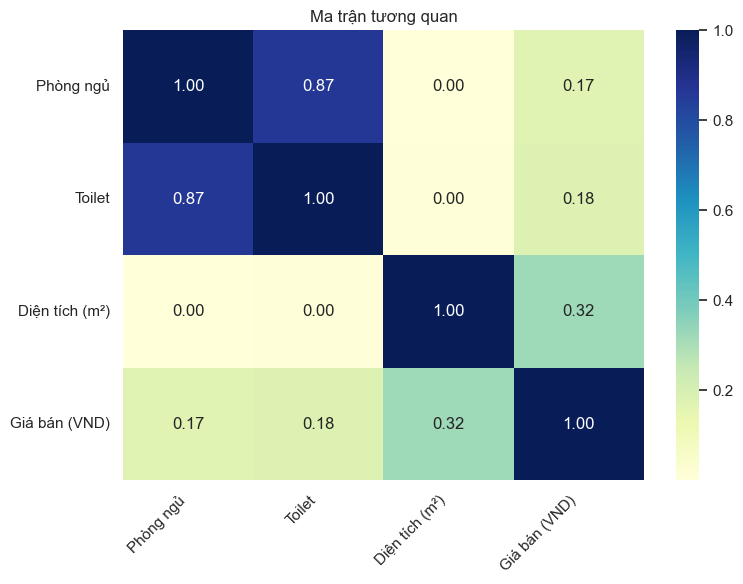

In [15]:
# Chọn các cột numeric cần hiển thị
cols = ['Phòng ngủ', 'Toilet', 'Diện tích (m²)', 'Giá bán (VND)']
corr_subset = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_subset, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Ma trận tương quan")
plt.tight_layout()
plt.show()


**Kết quả phân tích:**

Phòng ngủ và toilet có tương quan cao nhất (0.87), phản ánh rằng các bất động sản có nhiều phòng ngủ thường đi kèm với nhiều toilet.

Diện tích có tương quan vừa phải với giá bán (0.32), cho thấy diện tích là yếu tố ảnh hưởng đến giá nhưng không phải là yếu tố duy nhất.

Phòng ngủ và toilet có tương quan thấp với giá bán (khoảng 0.17–0.18), cho thấy tiện ích nội thất ảnh hưởng đến giá nhưng không mạnh bằng diện tích hoặc vị trí.


### 4.4.3. Ảnh hưởng của số phòng ngủ đến giá trị bất động sản

,Phòng ngủ,Giá (tỷ)
0,1,16.00
1,2,6.26
2,3,9.61
3,4,14.11
4,5,15.79
5,6,21.42
6,7,15.38
7,8,28.68
8,9,29.98
9,10,24.83


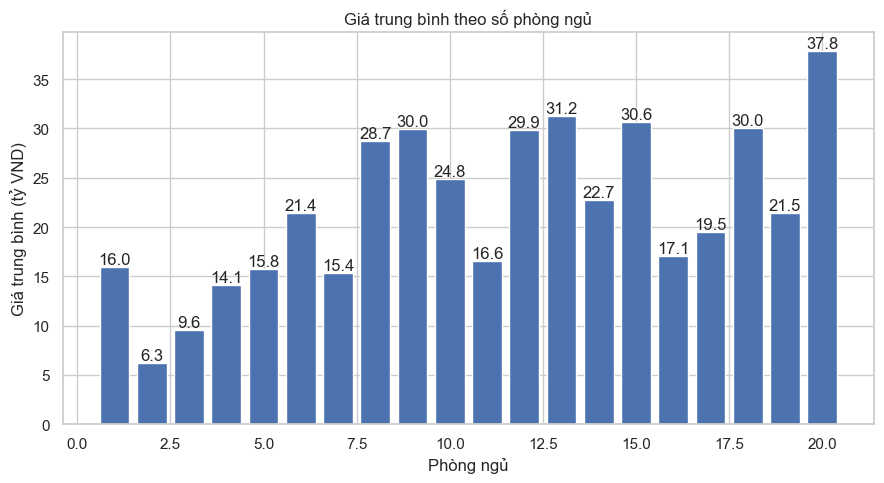

In [16]:
# Giá theo phòng ngủ (biểu đồ cột đứng)
if "Phòng ngủ" in df.columns:
    df_avg = (
        df.groupby("Phòng ngủ")["Giá (tỷ)"]
        .mean()
        .reset_index()
        .sort_values("Phòng ngủ")
    )

    display(df_avg)

    plt.figure(figsize=(9,5))
    bars = plt.bar(df_avg["Phòng ngủ"], df_avg["Giá (tỷ)"])

    plt.title("Giá trung bình theo số phòng ngủ")
    plt.xlabel("Phòng ngủ")
    plt.ylabel("Giá trung bình (tỷ VND)")
    plt.xticks(rotation=0)

    # Hiển thị giá trên đầu mỗi cột
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,  # vị trí giữa cột
            height,                           # trên đỉnh cột
            f"{height:.1f}",                  # 1 chữ số thập phân
            ha="center",
            va="bottom"
        )

    plt.tight_layout()
    plt.show()


**Kết quả phân tích:**

Xu hướng chung: số phòng ngủ càng nhiều thì giá trung bình càng cao, phản ánh phân khúc cao cấp. 

Các mốc nổi bật: 20 phòng ngủ ~37.84 tỷ (cao nhất), 13 phòng ~31.24 tỷ, 15 phòng ~30.62 tỷ, 9 phòng ~29.98 tỷ. 

Ngoại lệ: một số mức trung bình (như 7 phòng ~15.38 tỷ, 3 phòng ~9.61 tỷ) có giá thấp hơn, cho thấy giá trị còn chịu ảnh hưởng bởi vị trí, diện tích và pháp lý.


**Nhận xét:**

Số phòng ngủ là biến quan trọng trong định giá, đặc biệt trong phân khúc biệt thự và nhà phố.

Tuy nhiên, mối quan hệ không tuyến tính, phản ánh sự đa dạng của thị trường.


### 4.4.4. Ảnh hưởng của số toilet đến giá trị bất động sản

,Toilet,Giá (tỷ)
0,1,10.98
1,2,7.11
2,3,11.03
3,4,15.22
4,5,13.93
5,6,22.13
6,7,17.36
7,8,27.08
8,9,24.23
9,10,35.62


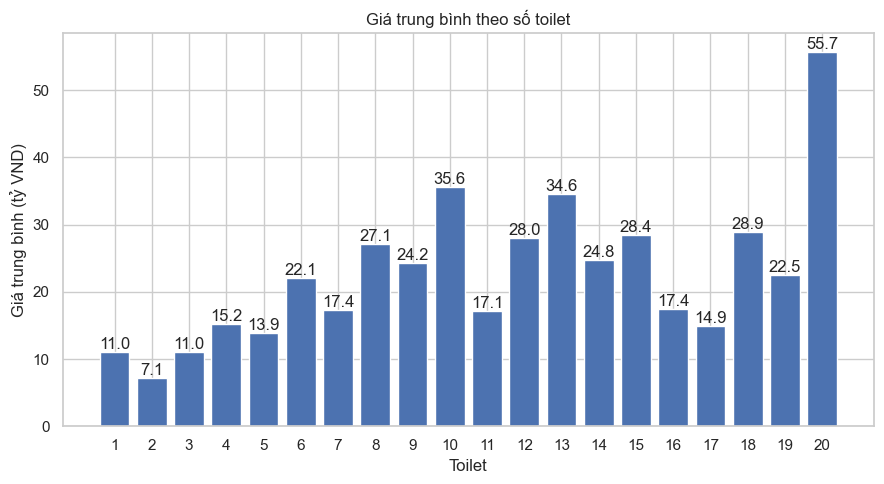

In [17]:
# Giá theo số toilet (biểu đồ cột đứng)
if "Toilet" in df.columns:
    df_avg = (
        df.groupby("Toilet")["Giá (tỷ)"]
        .mean()
        .reset_index()
        .sort_values("Toilet")
    )

    display(df_avg)

# Vẽ biểu đồ
plt.figure(figsize=(9,5))
bars = plt.bar(df_avg["Toilet"].astype(str), df_avg["Giá (tỷ)"])  # ép x thành string

plt.title("Giá trung bình theo số toilet")
plt.xlabel("Toilet")
plt.ylabel("Giá trung bình (tỷ VND)")
plt.xticks(rotation=0)

# Hiển thị số trên đầu cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # vị trí giữa cột
        height,                           # vị trí cao hơn cột
        f"{height:.1f}",                  # format 1 chữ số thập phân
        ha="center", va="bottom"          # căn giữa ngang, ở trên cột
    )

plt.tight_layout()
plt.show()


**Kết quả phân tích:**

Xu hướng chung: số toilet càng nhiều thì giá trung bình càng cao, phản ánh phân khúc cao cấp. 

Các mốc nổi bật: 20 toilet ~55.66 tỷ (cao nhất), 10 toilet ~35.62 tỷ, 13 toilet ~34.59 tỷ, 15 toilet ~28.38 tỷ. 

Ngoại lệ: một số mức trung bình (như 5 toilet ~13.93 tỷ, 3 toilet ~11.03 tỷ) có giá thấp hơn, cho thấy giá trị còn chịu ảnh hưởng bởi diện tích, vị trí và pháp lý.


**Nhận xét:**

Số toilet có tương quan cao với số phòng ngủ (hệ số 0.87), nhưng ảnh hưởng đến giá bán ở mức vừa phải.

Toilet đóng vai trò bổ trợ cho tiện ích và sự tiện nghi, đặc biệt trong phân khúc biệt thự và nhà phố.


### 4.4.5. Tác động của yếu tố pháp lý đến giá trị bất động sản

,Pháp lý,Giá (tỷ)
3,Đang chờ sổ,1.59
0,Hợp đồng mua bán,7.20
1,Không rõ,8.44
2,Sổ đỏ/ Sổ hồng,12.77


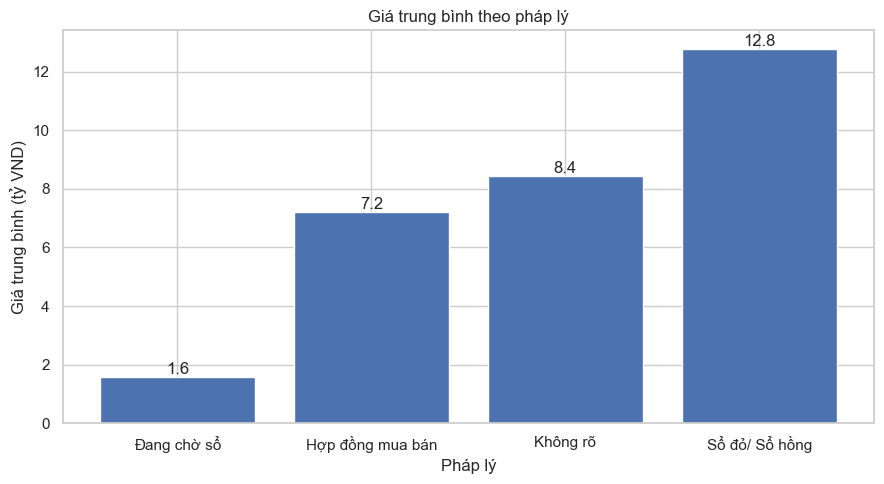

In [18]:
# Giá theo pháp lý (biểu đồ cột đứng)
if "Pháp lý" in df.columns:
    df_avg = (
        df.groupby("Pháp lý")["Giá (tỷ)"]
        .mean()
        .reset_index()
        .sort_values("Giá (tỷ)", ascending=True)
    )

    display(df_avg)

    plt.figure(figsize=(9,5))
    bars = plt.bar(df_avg["Pháp lý"], df_avg["Giá (tỷ)"])

    plt.title("Giá trung bình theo pháp lý")
    plt.xlabel("Pháp lý")
    plt.ylabel("Giá trung bình (tỷ VND)")

    # Hiển thị giá trên đầu mỗi cột
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,  # vị trí giữa cột
            height,                           # trên đỉnh cột
            f"{height:.1f}",                  # 1 chữ số thập phân
            ha="center",
            va="bottom"
        )

    plt.tight_layout()
    plt.show()


**Kết quả phân tích:**

Bất động sản có pháp lý rõ ràng thường được định giá cao hơn đáng kể. Cụ thể, nhóm có sổ đỏ/sổ hồng đạt mức giá trung bình cao nhất (12.77 tỷ đồng), vượt xa các nhóm còn lại. 

Những sản phẩm không rõ pháp lý có giá trung bình 8.44 tỷ đồng, trong khi hợp đồng mua bán ghi nhận 7.20 tỷ đồng. 

Đáng chú ý, nhóm đang chờ sổ chỉ đạt mức giá trung bình 1.60 tỷ đồng, phản ánh mức độ rủi ro cao và khả năng thanh khoản thấp.


**Nhận xét:**

Pháp lý minh bạch không chỉ nâng cao giá trị mà còn cải thiện tính thanh khoản và độ tin cậy của sản phẩm.

Các sản phẩm chưa có sổ hoặc pháp lý không rõ ràng thường bị định giá thấp do rủi ro cao.
